PREDICTING OF SUSPECT GENDER USIG CATBOOST MODEL. PROVIDING EXPLANATION FOR THE MODEL OUTCOME

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, classification_report

In [3]:
cd /content/drive/MyDrive/Colab Notebooks/Research/NY_crime/Data_NY_crime

/content/drive/MyDrive/Colab Notebooks/Research/NY_crime/Data_NY_crime


In [4]:
df = pd.read_csv('NYPD_Complaint_Data_Current__Year_To_Date__20240916.csv')
df.head()

<ipython-input-4-5c1a20ee3403>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('NYPD_Complaint_Data_Current__Year_To_Date__20240916.csv')


,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
0,280510523,14,MANHATTAN,01/11/2024,04:00:00,NaN,(null),COMPLETED,(null),NaN,...,NaN,18-24,BLACK,F,985764.0,213806.0,40.753533,-73.994537,"(40.7535327012632, -73.9945368920152)",POINT (-73.9945368920152 40.7535327012632)
1,286736978,122,STATEN ISLAND,01/01/2015,13:00:00,01/01/2015,15:00:00,COMPLETED,(null),NaN,...,NaN,25-44,UNKNOWN,F,954827.0,148519.0,40.574286,-74.105914,"(40.5742856881925, -74.1059144051212)",POINT (-74.1059144051212 40.5742856881925)
2,289019347,1,MANHATTAN,06/20/2024,16:12:00,06/20/2024,16:13:00,COMPLETED,(null),NaN,...,2.0,25-44,BLACK,F,982466.0,197787.0,40.709556,-74.006435,"(40.70955616028041, -74.00643483276845)",POINT (-74.00643483276845 40.70955616028041)
3,283688417,121,STATEN ISLAND,03/11/2024,10:00:00,03/13/2024,13:20:00,COMPLETED,(null),NaN,...,NaN,25-44,BLACK,F,938414.0,170500.0,40.634542,-74.165142,"(40.634542, -74.165142)",POINT (-74.165142 40.634542)
4,280934552,122,STATEN ISLAND,11/14/2023,12:00:00,11/17/2023,12:00:00,COMPLETED,(null),NaN,...,NaN,65+,WHITE,M,941085.0,135276.0,40.537874,-74.155293,"(40.537874, -74.155293)",POINT (-74.155293 40.537874)


# Data Preprocessing

In [5]:
df['SUSP_SEX'].value_counts()

,count
SUSP_SEX,
M,152788
U,55786
F,41687
(null),31808


In [6]:
df.columns

Index(['CMPLNT_NUM', 'ADDR_PCT_CD', 'BORO_NM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM',
       'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'CRM_ATPT_CPTD_CD', 'HADEVELOPT',
       'HOUSING_PSA', 'JURISDICTION_CODE', 'JURIS_DESC', 'KY_CD', 'LAW_CAT_CD',
       'LOC_OF_OCCUR_DESC', 'OFNS_DESC', 'PARKS_NM', 'PATROL_BORO', 'PD_CD',
       'PD_DESC', 'PREM_TYP_DESC', 'RPT_DT', 'STATION_NAME', 'SUSP_AGE_GROUP',
       'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT', 'VIC_AGE_GROUP',
       'VIC_RACE', 'VIC_SEX', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude',
       'Longitude', 'Lat_Lon', 'New Georeferenced Column'],
      dtype='object')

In [7]:
df.shape

(282069, 36)

ELININTANG FEATURES WITH FEW DATA

In [8]:
features_to_drop = ['HADEVELOPT']
df = df.drop(columns=features_to_drop)

In [9]:
features_to_drop = ['X_COORD_CD', 'Y_COORD_CD','VIC_RACE', 'VIC_SEX',
'Latitude', 'Longitude', 'Lat_Lon', 'New Georeferenced Column', 'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'TRANSIT_DISTRICT', 'HOUSING_PSA','STATION_NAME']
df = df.drop(columns=features_to_drop)

# question - should we clean 'VIC_AGE_GROUP' in case we perdict suspect_gender

In [10]:
df.shape

(282069, 22)

GENDER FEATURE ANAYSIS AND CLEANIGN


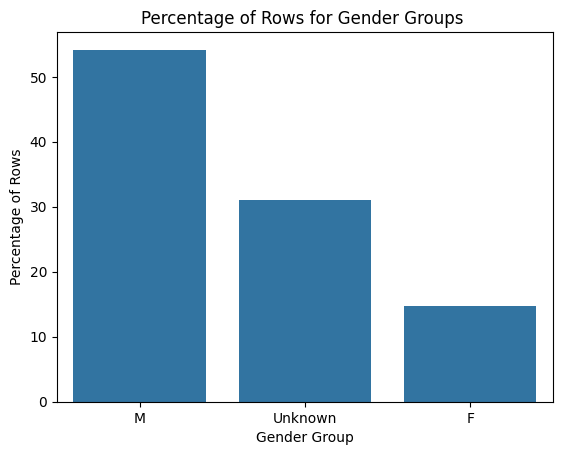

In [11]:
df['SUSP_SEX_Group'] = df['SUSP_SEX'].apply(lambda x: 'Unknown' if x not in ['F', 'M'] else x)


gender_counts = df['SUSP_SEX_Group'].value_counts(normalize=True) * 100
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.xlabel('Gender Group')
plt.ylabel('Percentage of Rows')
plt.title('Percentage of Rows for Gender Groups ')
plt.show()


In [12]:


# Create a table from the gender_counts
gender_table = pd.DataFrame({'Gender Group': gender_counts.index, 'Percentage of Rows': gender_counts.values})


print(gender_table)

  Gender Group  Percentage of Rows
0            M           54.166888
1      Unknown           31.054104
2            F           14.779008


In [13]:
 df = df.query('SUSP_SEX in ["F", "M"]')

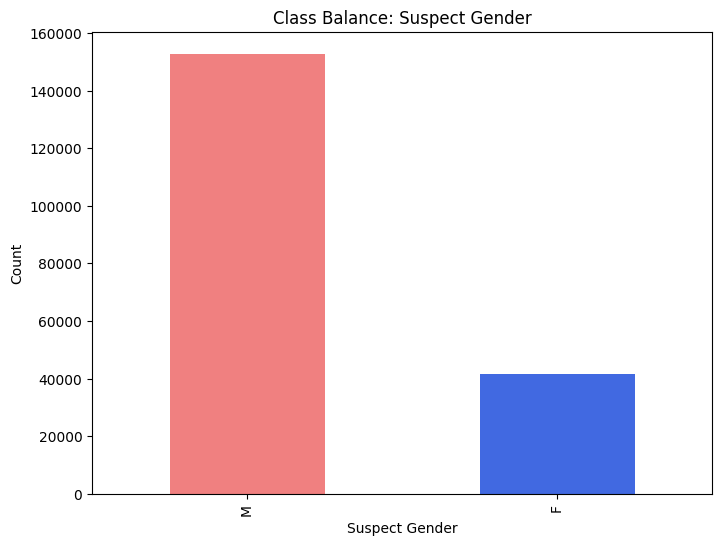

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
df['SUSP_SEX'].value_counts().plot(kind='bar', color=['lightcoral', 'royalblue'])
plt.title('Class Balance: Suspect Gender')
plt.xlabel('Suspect Gender')
plt.ylabel('Count')
plt.show()


In [15]:
gender_counts = df['SUSP_SEX'].value_counts()
total_count = gender_counts.sum()
frequency_table = pd.DataFrame({'Frequency': gender_counts,
                               'Percent of Total Count': (gender_counts / total_count) * 100})
frequency_table.loc['Total'] = frequency_table.sum()
print(frequency_table)

          Frequency  Percent of Total Count
SUSP_SEX                                   
M          152788.0                78.56434
F           41687.0                21.43566
Total      194475.0               100.00000


DATE FEATURE ANALYSIS CLEANING

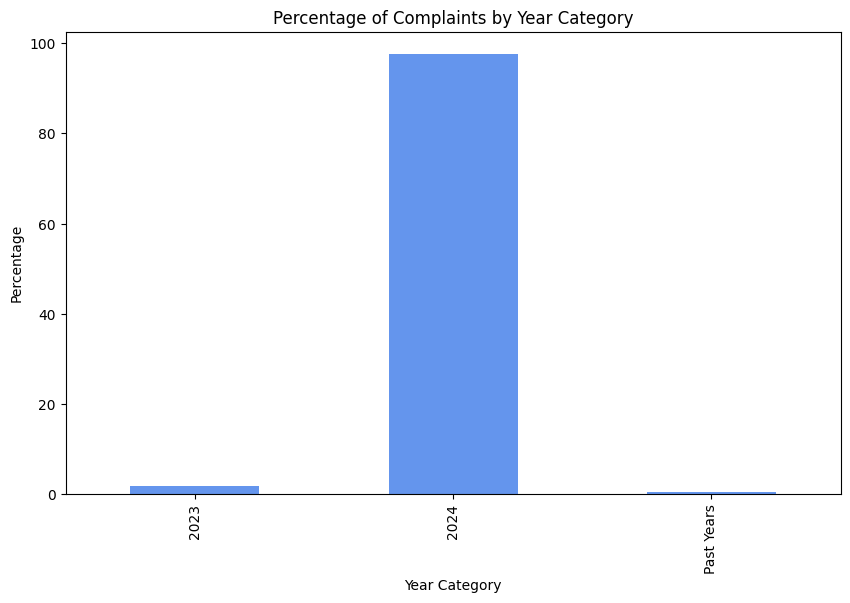

Year_Category
2023           1.840358
2024          97.658287
Past Years     0.501355
Name: CMPLNT_FR_DT, dtype: float64


In [16]:
import matplotlib.pyplot as plt
df_copy = df.copy()

df_copy['CMPLNT_FR_DT'] = pd.to_datetime(df_copy['CMPLNT_FR_DT'], errors='coerce')
df_copy['Year'] = df_copy['CMPLNT_FR_DT'].dt.year
year_counts = df_copy.groupby('Year')['CMPLNT_FR_DT'].count()
year_percentages = (year_counts / year_counts.sum()) * 100


df_copy['Year_Category'] = 'Past Years'
df_copy.loc[df_copy['Year'] == 2023, 'Year_Category'] = '2023'
df_copy.loc[df_copy['Year'] == 2024, 'Year_Category'] = '2024'


year_category_counts = df_copy.groupby('Year_Category')['CMPLNT_FR_DT'].count()
year_category_percentages = (year_category_counts / year_category_counts.sum()) * 100


plt.figure(figsize=(10, 6))
year_category_percentages.plot(kind='bar', color='cornflowerblue')
plt.title('Percentage of Complaints by Year Category')
plt.xlabel('Year Category')
plt.ylabel('Percentage')
plt.show()

print(year_category_percentages)

DATE FORMATTING

In [17]:
from tqdm import tqdm
dates = []

for dt in tqdm(df['CMPLNT_FR_DT'].values):
    try:
        dates.append(pd.to_datetime(dt, format='%m/%d/%Y'))
    except:
        dates.append(None)

100%|██████████| 194475/194475 [00:21<00:00, 9027.56it/s]


In [18]:
df['date'] = dates

In [19]:
df = df.dropna()

In [20]:
df = df[df['date'] > '2024-01-01']

In [21]:
df['datetime'] = pd.to_datetime(df['CMPLNT_FR_DT'] + ' ' + df['CMPLNT_FR_TM'])

In [22]:
df.shape

(188733, 25)

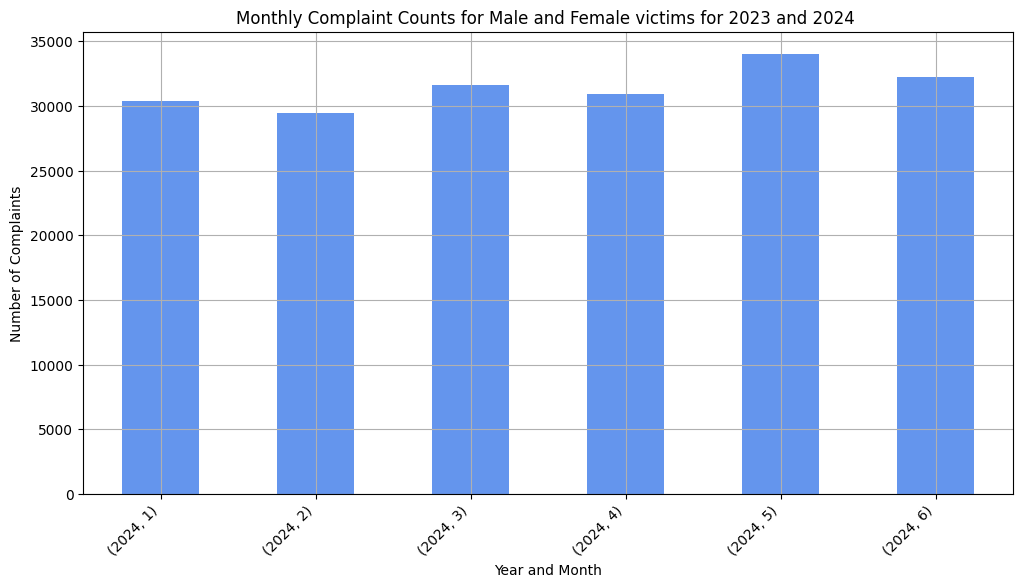

In [23]:
df_copy = df.copy()
df_copy['CMPLNT_FR_DT'] = pd.to_datetime(df_copy['CMPLNT_FR_DT'], errors='coerce')


df_copy['Year'] = df_copy['CMPLNT_FR_DT'].dt.year
df_copy['Month'] = df_copy['CMPLNT_FR_DT'].dt.month

df_copy = df_copy[(df_copy['Year'] == 2023) | (df_copy['Year'] == 2024)]


monthly_counts = df_copy.groupby(['Year', 'Month'])['CMPLNT_FR_DT'].count()

plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='bar', color='cornflowerblue')
plt.title('Monthly Complaint Counts for Male and Female victims for 2023 and 2024 ')
plt.xlabel('Year and Month')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45, ha='right')
plt.grid(True)  # Add grid to the plot
plt.show()


SUSPECT AGE ANALYSIS AND CELANING

In [24]:

df['SUSP_AGE_GROUP_Categorized'] = df['SUSP_AGE_GROUP'].apply(
    lambda x: 'Other' if x not in ['18-24', '25-44', '45-64', '65+', '<18'] else x
)

# Calculate the percentage of rows for each age group
age_group_counts = df['SUSP_AGE_GROUP_Categorized'].value_counts(normalize=True) * 100

frequency_table = pd.DataFrame({'Frequency': df['SUSP_AGE_GROUP_Categorized'].value_counts(),
                               'Percent of Total Count': age_group_counts})
frequency_table.loc['Total'] = frequency_table.sum()
print(frequency_table)


                            Frequency  Percent of Total Count
SUSP_AGE_GROUP_Categorized                                   
25-44                         81189.0               43.017914
Other                         50211.0               26.604250
45-64                         27364.0               14.498789
18-24                         20894.0               11.070666
<18                            6074.0                3.218303
65+                            3001.0                1.590077
Total                        188733.0              100.000000


In [25]:
true_ages = ['18-24', '25-44', '45-64', '65+', '<18']
df = df[df['SUSP_AGE_GROUP'].isin(true_ages)]

In [26]:
true_ages = ['18-24', '25-44', '45-64', '65+', '<18']
df = df[df['VIC_AGE_GROUP'].isin(true_ages)]

In [27]:
df.shape #after cleaning ages

(82290, 26)

In [28]:
df['hour']=df['datetime'].dt.dayofweek
df['dayofweek']=df['datetime'].dt.dayofweek
df['month']=df['datetime'].dt.month

## <b> Random Forest model building </b>


In [29]:
import numpy as np
features = ['LAW_CAT_CD', 'PD_DESC', 'BORO_NM', 'PREM_TYP_DESC','LOC_OF_OCCUR_DESC','PARKS_NM', 'hour', 'dayofweek','month','SUSP_RACE','SUSP_AGE_GROUP',"VIC_AGE_GROUP"]


USING IMB LEARNING AS CLASS IMBALANCE OF TERGET VARIABLE

In [30]:
pip install imblearn

In [31]:
xdf = df[features + ['SUSP_SEX']]
xdf = pd.get_dummies(data=xdf, columns=features)

X_brf = xdf.iloc[:, 1:].astype(float)
le = LabelEncoder()
sex = le.fit_transform(xdf['SUSP_SEX'].values)
y_brf = sex


from imblearn.ensemble import BalancedRandomForestClassifier

brf = BalancedRandomForestClassifier(
        n_estimators=100,
        sampling_strategy="all",
        random_state=42,
        n_jobs=16,
    )


X_train_brf, X_test_brf, y_train_brf, y_test_brf = train_test_split(X_brf, y_brf, test_size=0.2, stratify=y_brf,random_state=0)
#this is the first version
#rf = RandomForestClassifier()
#rf.fit(X_train, y_train)
brf.fit(X_train_brf, y_train_brf)

pred_brf =brf.predict(X_test_brf)

print(classification_report(y_test_brf, pred_brf))

              precision    recall  f1-score   support

           0       0.36      0.44      0.40      4358
           1       0.78      0.72      0.75     12100

    accuracy                           0.65     16458
   macro avg       0.57      0.58      0.57     16458
weighted avg       0.67      0.65      0.66     16458



In [32]:

display(X_brf)

,LAW_CAT_CD_FELONY,LAW_CAT_CD_MISDEMEANOR,LAW_CAT_CD_VIOLATION,"PD_DESC_ACCOSTING,FRAUDULENT","PD_DESC_ADM.CODE,UNCLASSIFIED MISDEMEA",PD_DESC_AGGRAVATED CRIMINAL CONTEMPT,PD_DESC_AGGRAVATED HARASSMENT 1,PD_DESC_AGGRAVATED HARASSMENT 2,PD_DESC_AGGRAVATED SEXUAL ASBUSE,"PD_DESC_AGRICULTURE & MARKETS LAW,UNCL",...,SUSP_AGE_GROUP_18-24,SUSP_AGE_GROUP_25-44,SUSP_AGE_GROUP_45-64,SUSP_AGE_GROUP_65+,SUSP_AGE_GROUP_<18,VIC_AGE_GROUP_18-24,VIC_AGE_GROUP_25-44,VIC_AGE_GROUP_45-64,VIC_AGE_GROUP_65+,VIC_AGE_GROUP_<18
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
18,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
24,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282057,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
282058,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
282059,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
282061,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [40]:

len(X_brf.columns)


547

## <b> CatBoost model buildig </b>

In [33]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.3 MB/s eta 0:00:00


In [34]:
from catboost import CatBoostClassifier

In [35]:
from imblearn.under_sampling import RandomUnderSampler

X_CB = df[features]
y = df['SUSP_SEX']
X_trainCB, X_testCB, y_train, y_test = train_test_split(X_CB, y, test_size=0.2, stratify=y,random_state=0)

rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_trainCB, y_train)


model_CB = CatBoostClassifier(iterations=1000, learning_rate=0.1, random_seed=12, eval_metric = "F1")
model_CB.fit(
    X_resampled, y_resampled,
    cat_features=features,
    eval_set=(X_testCB, y_test),
    early_stopping_rounds=100,
    verbose=True
)

pred_CB = model_CB.predict(X_testCB)


0:	learn: 0.4539358	test: 0.4983668	best: 0.4983668 (0)	total: 494ms	remaining: 8m 13s
1:	learn: 0.5461485	test: 0.5983944	best: 0.5983944 (1)	total: 779ms	remaining: 6m 28s
2:	learn: 0.5345264	test: 0.5825305	best: 0.5983944 (1)	total: 976ms	remaining: 5m 24s
3:	learn: 0.5353890	test: 0.5810104	best: 0.5983944 (1)	total: 1.15s	remaining: 4m 47s
4:	learn: 0.5467176	test: 0.5976513	best: 0.5983944 (1)	total: 1.43s	remaining: 4m 44s
5:	learn: 0.5504941	test: 0.6034782	best: 0.6034782 (5)	total: 1.58s	remaining: 4m 21s
6:	learn: 0.5498196	test: 0.6020838	best: 0.6034782 (5)	total: 1.88s	remaining: 4m 27s
7:	learn: 0.5546246	test: 0.6099979	best: 0.6099979 (7)	total: 2.09s	remaining: 4m 19s
8:	learn: 0.5561307	test: 0.6127859	best: 0.6127859 (8)	total: 2.35s	remaining: 4m 18s
9:	learn: 0.5583304	test: 0.6142909	best: 0.6142909 (9)	total: 2.62s	remaining: 4m 19s
10:	learn: 0.5597527	test: 0.6169520	best: 0.6169520 (10)	total: 2.95s	remaining: 4m 25s
11:	learn: 0.5602910	test: 0.6192590	best

In [36]:
print(classification_report(y_test,pred_CB))

              precision    recall  f1-score   support

           F       0.34      0.66      0.45      4358
           M       0.82      0.54      0.65     12100

    accuracy                           0.58     16458
   macro avg       0.58      0.60      0.55     16458
weighted avg       0.69      0.58      0.60     16458



## <b> SHAP FOR SUSP_SEX=F FOR CATBOOST </b>

SHAP EXPLAINER FOR CATBOOST FOR 1000 samples from xdf(train and test sets)

In [37]:
import shap

In [38]:
shap.initjs()

In [39]:
explainer = shap.TreeExplainer(model_CB)
shap_values = explainer(X_CB[:1000],y)


Examine influence of features on model prediction. PREM_TYPE_DESC = TRANSIT-NYC SUBWAY pushed prediction towards male suspect gender for the 1st prediced item.

In [40]:
shap.initjs()
shap.plots.force(shap_values[0, ...],)

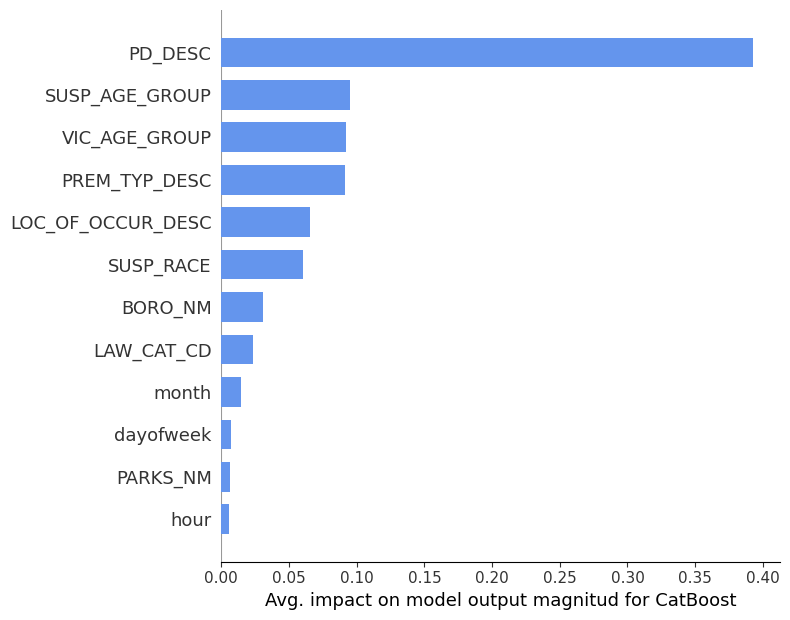

In [41]:
shap.summary_plot(shap_values, X_CB[:1000], plot_type="bar",show=False,color='cornflowerblue')
plt.xlabel("Avg. impact on model output magnitud for CatBoost")
plt.show()

In [42]:
top_10_PD_DESC = shap_values.abs.mean(0).values.argsort()[::-1][:10]
print(top_10_PD_DESC)

[ 1 10 11  3  4  9  2  0  8  7]


Building a shap dependency plot to illustrate relation of crime location and prediced label.

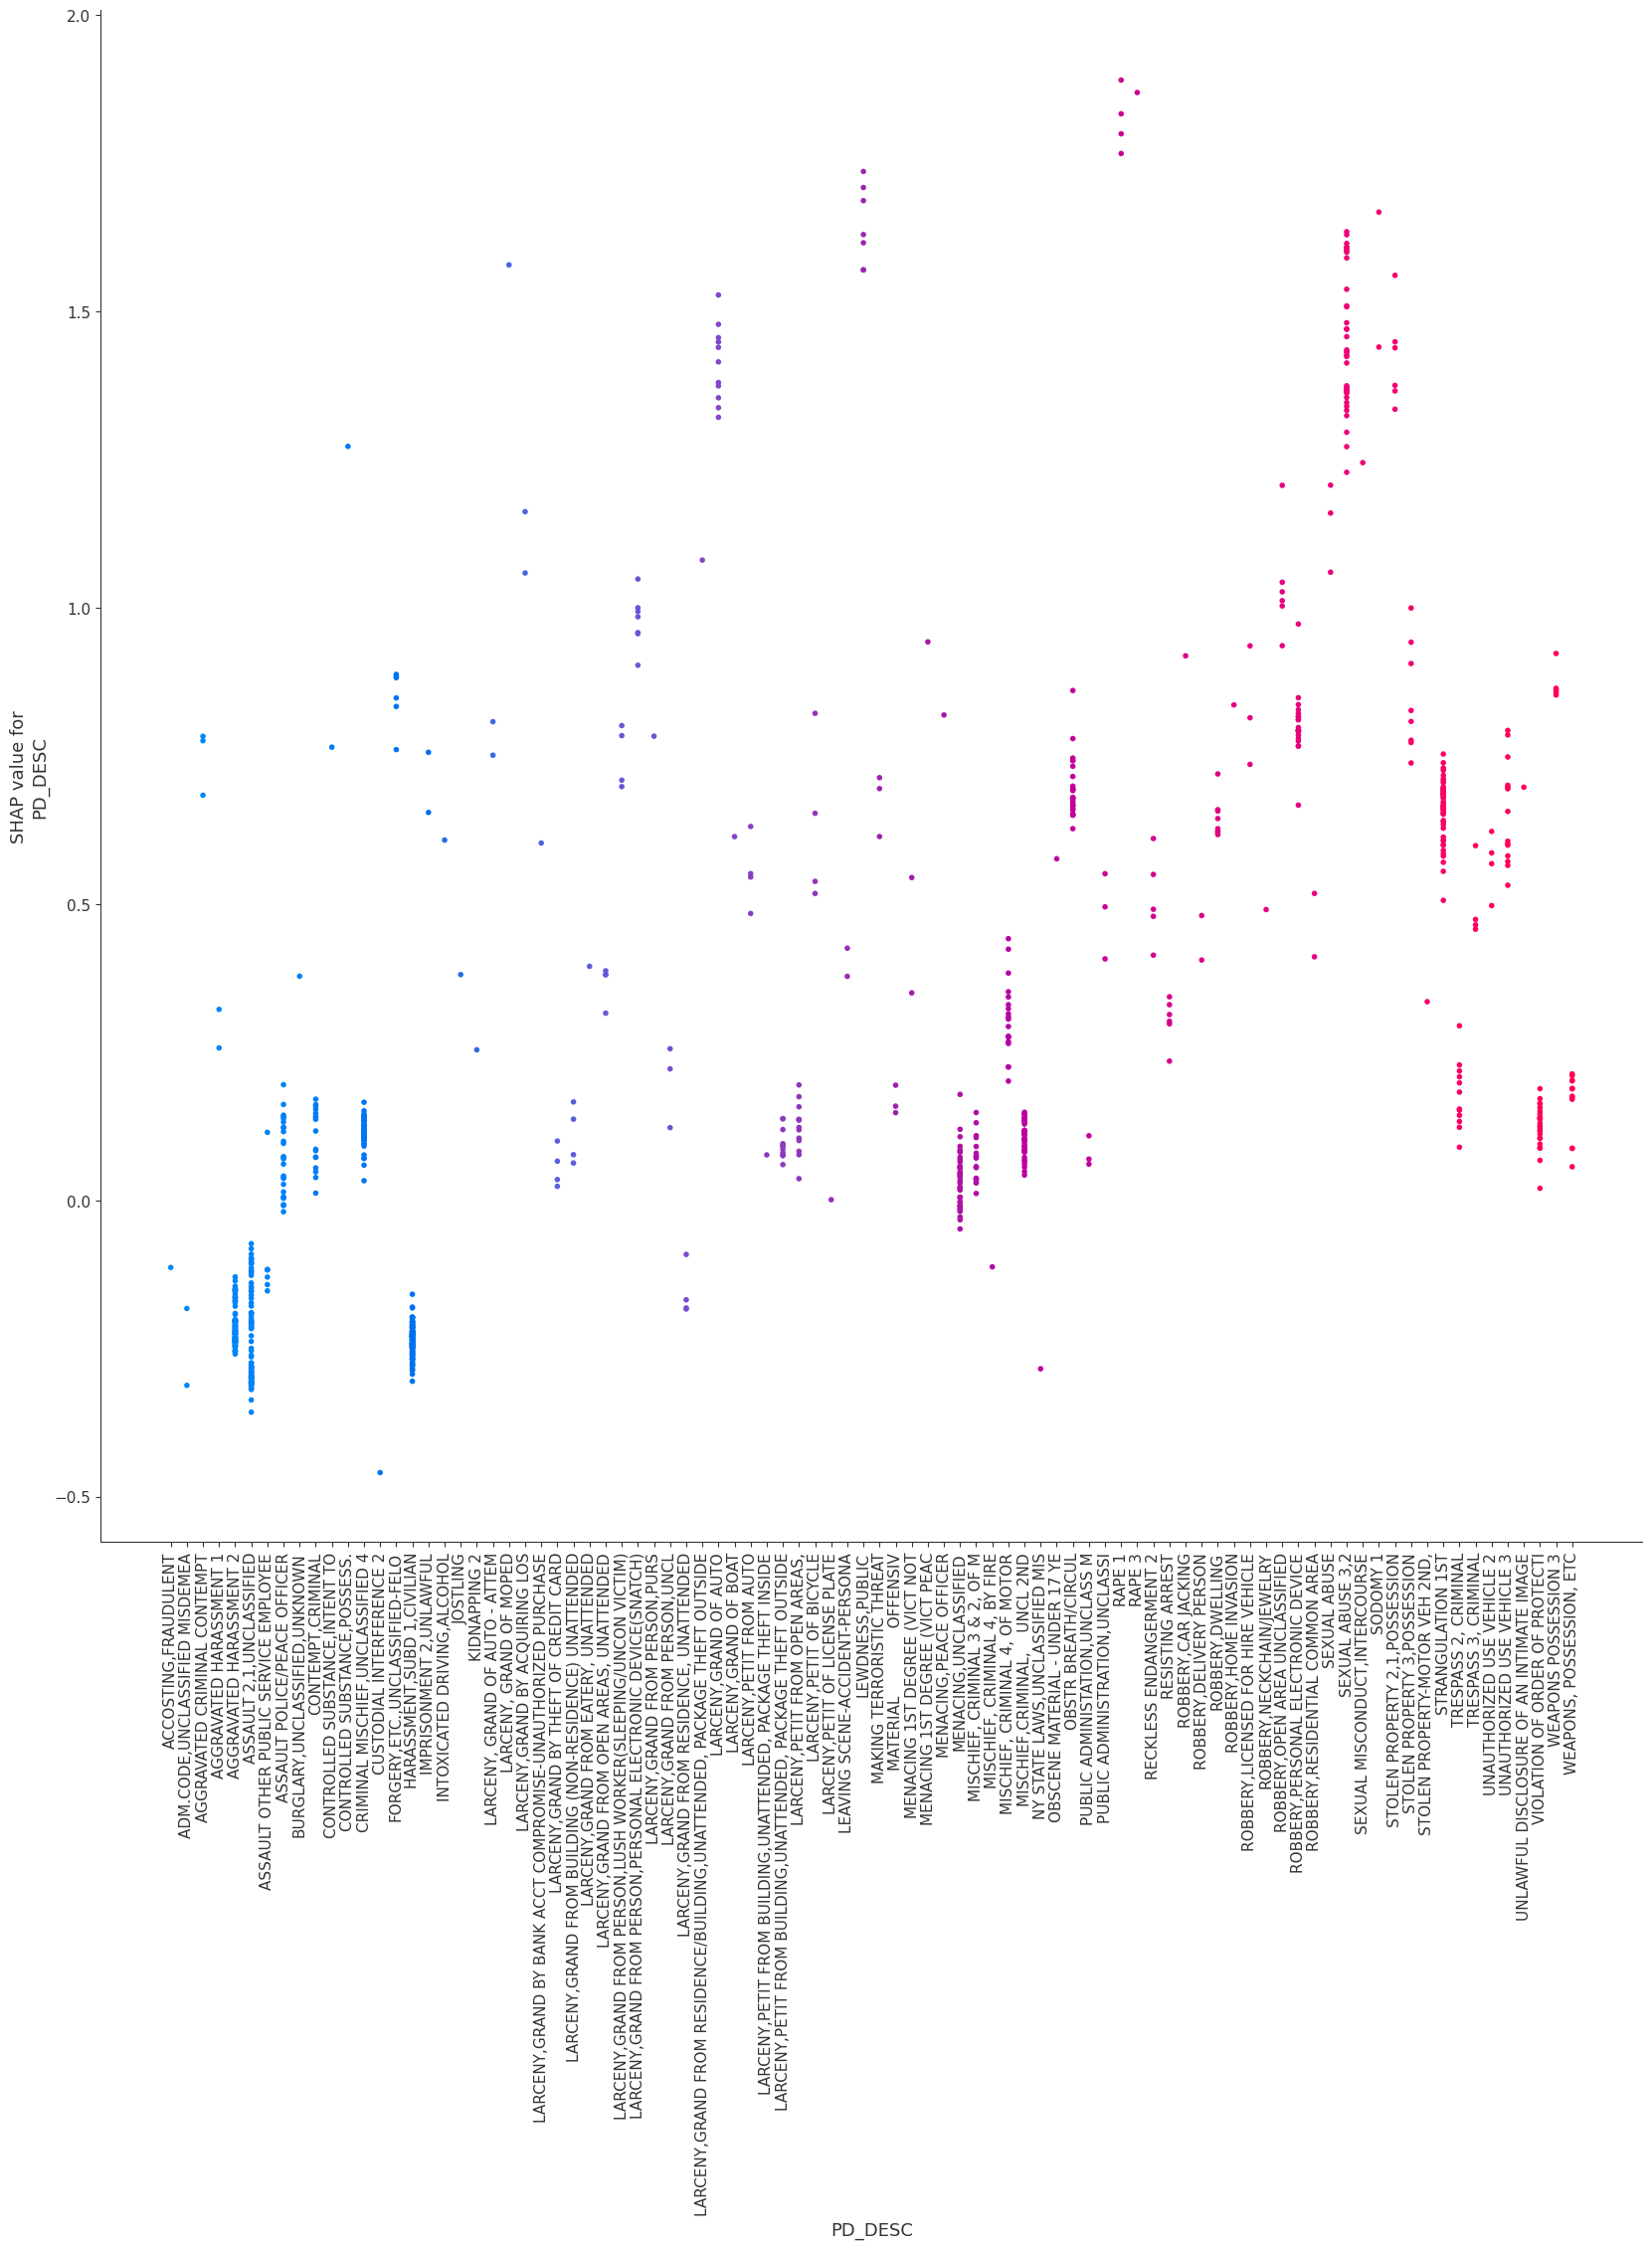

In [43]:
shap.dependence_plot("PD_DESC", shap_values.values, X_CB[:1000], interaction_index="PD_DESC", show=False)
plt.gcf().set_size_inches(20, 20)
plt.show()

Building a shap dependency plot to illustrate relation of suspect age, location and prediced label.

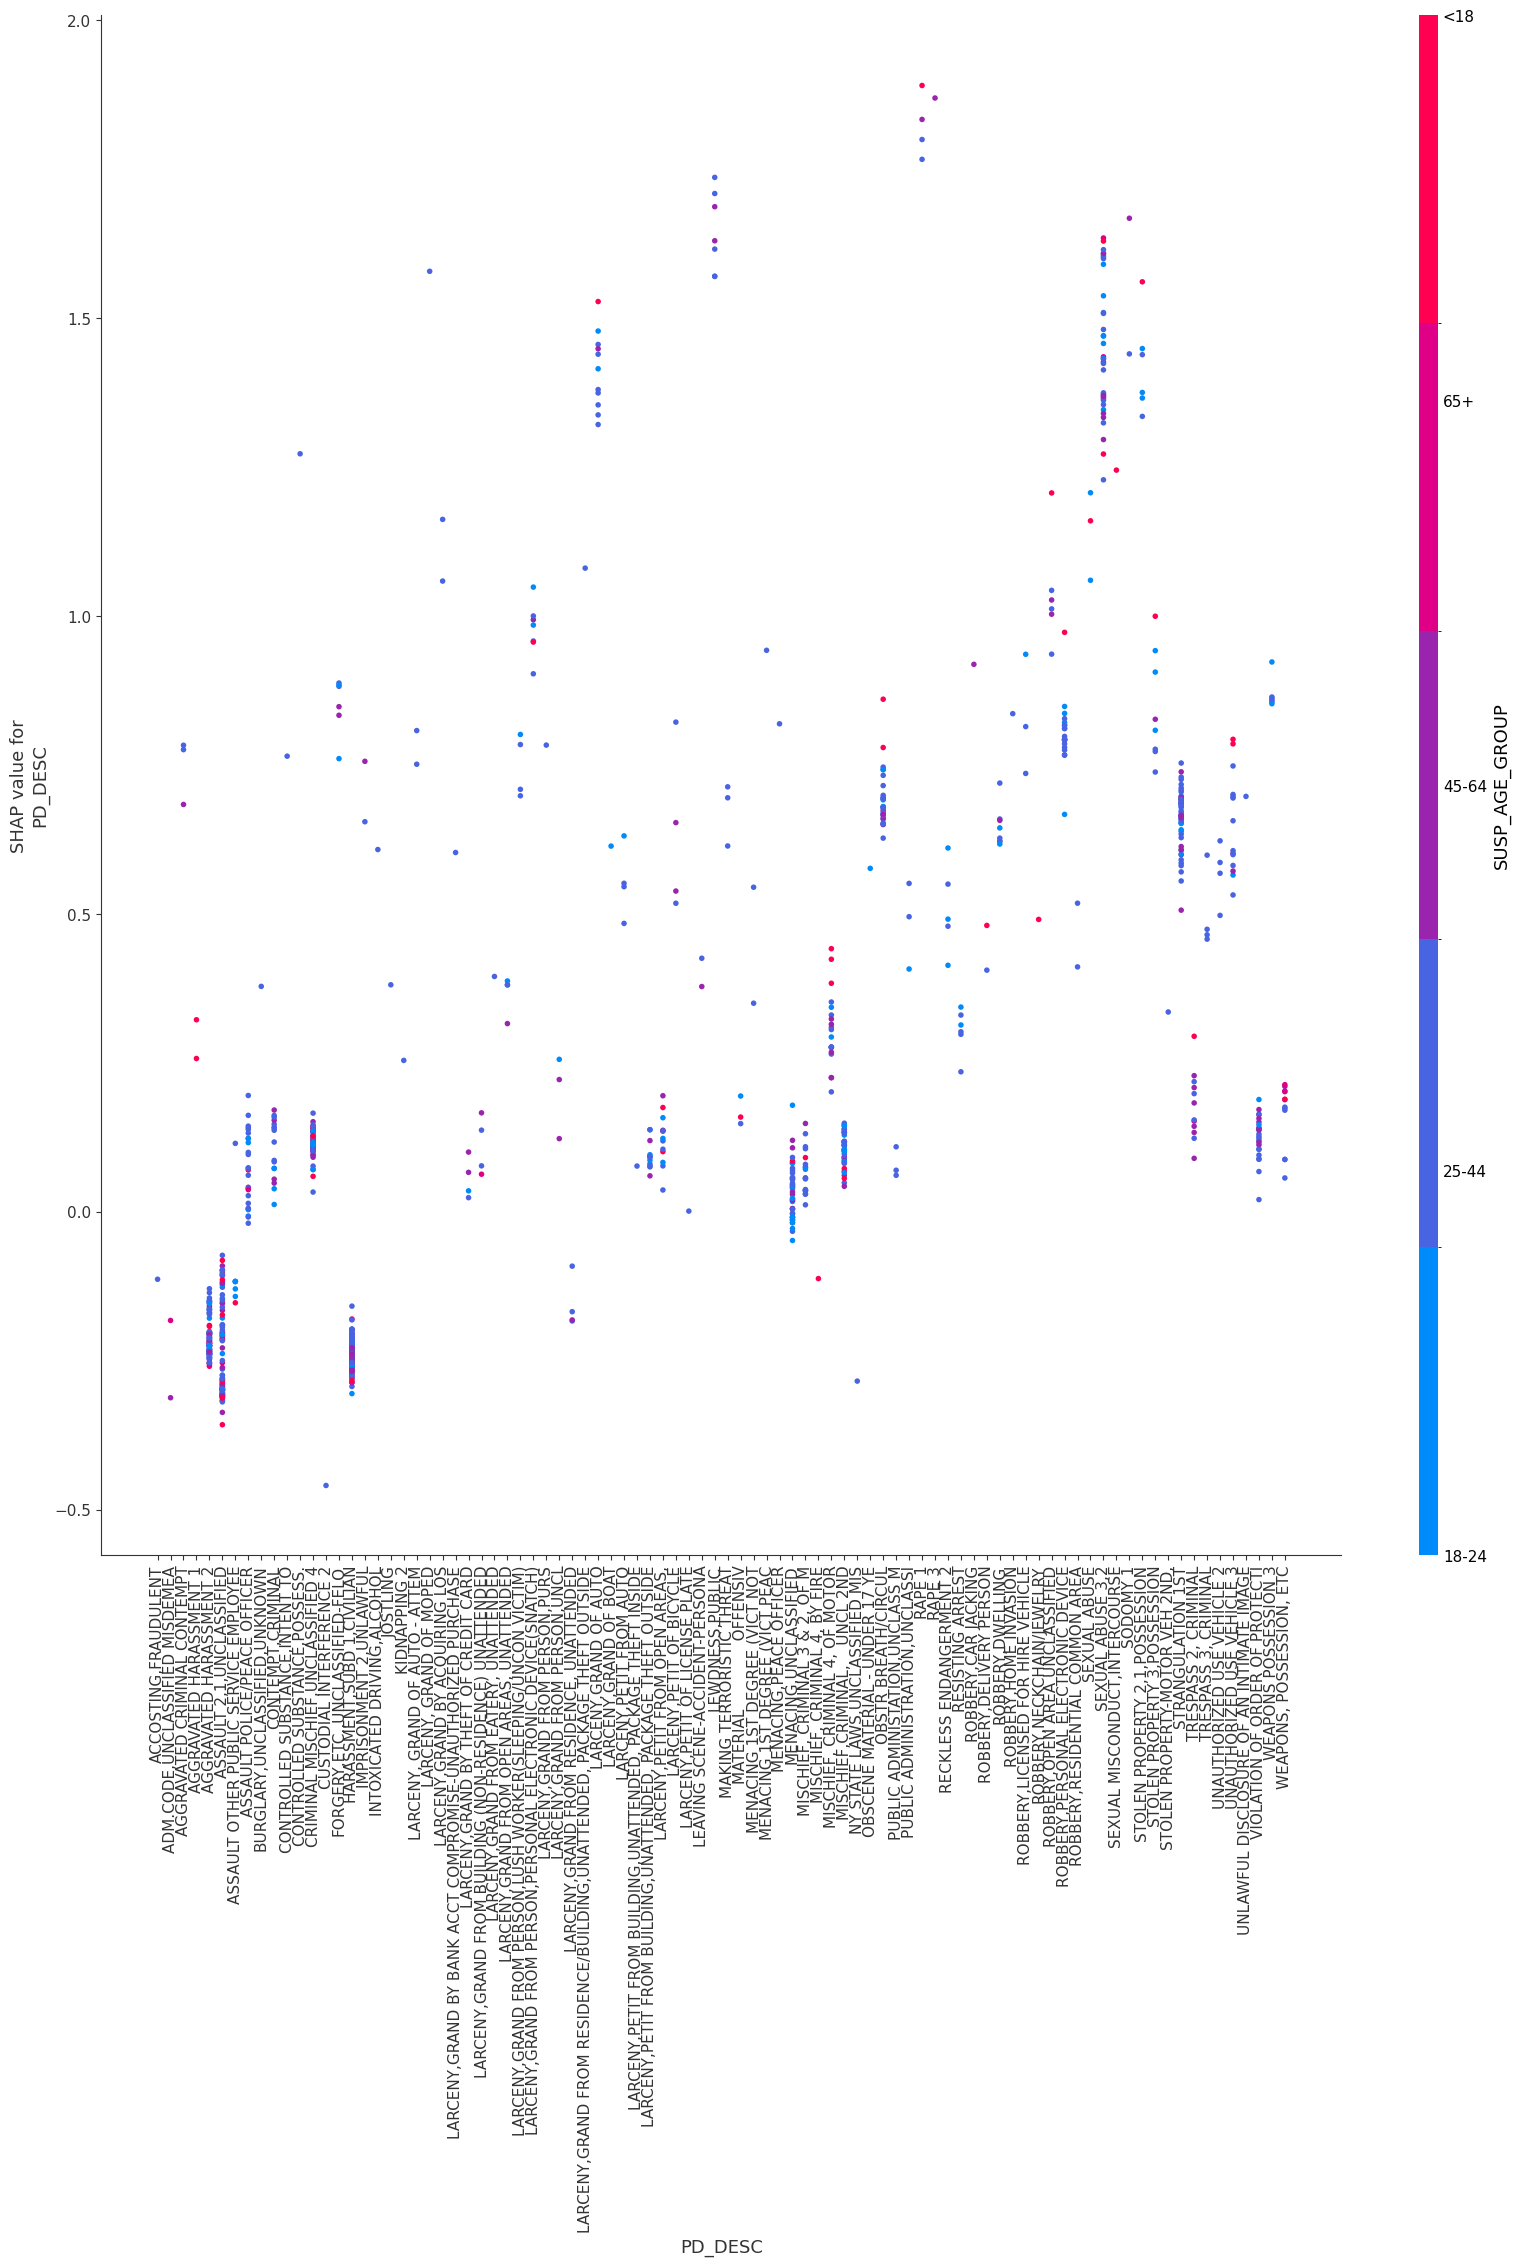

In [46]:
shap.dependence_plot("PD_DESC", shap_values.values, X_CB[:1000], interaction_index="SUSP_AGE_GROUP",show=False)
plt.gcf().set_size_inches(20, 20)
plt.show()



In [ ]:
y[:10]

,SUSP_SEX
2,M
8,M
9,M
18,M
24,F
38,M
40,F
41,M
45,M
47,M


Explanation of 24th item of predictied lables. Crime type HARRASMENT associated with female gender

In [47]:
shap.initjs()
shap.plots.force(shap_values[24, ...])

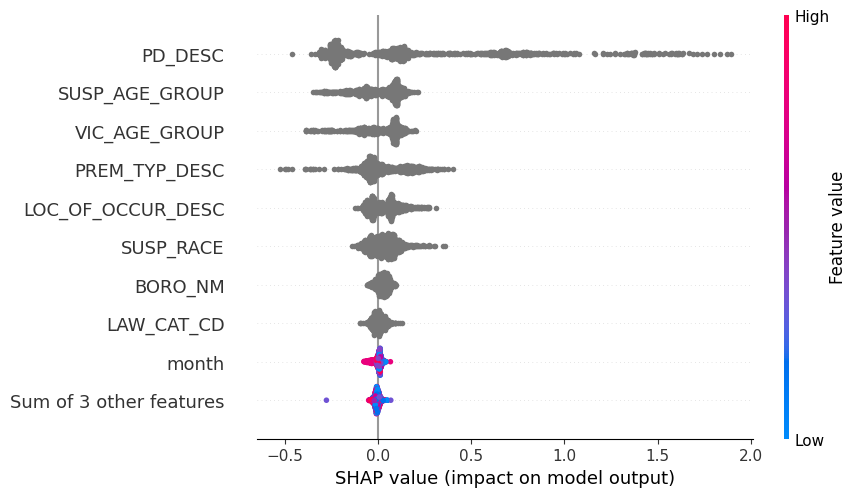

In [ ]:
shap.plots.beeswarm(shap_values)

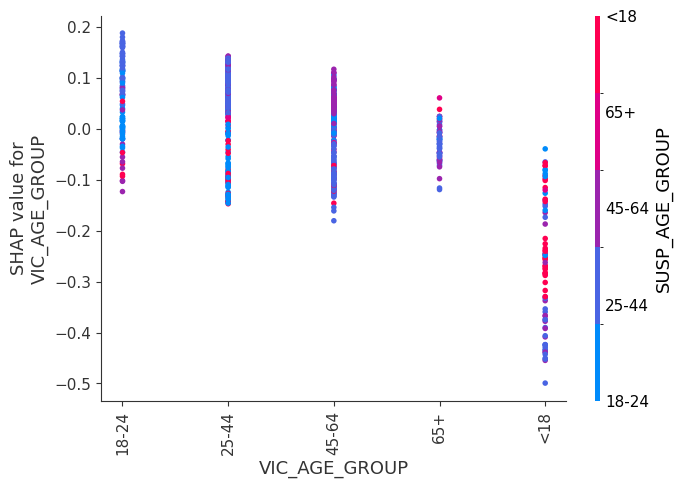

In [ ]:
shap.dependence_plot("VIC_AGE_GROUP", shap_values.values, xdf[:1000], interaction_index="SUSP_AGE_GROUP")
#plt.xlim(0,5)